In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import Image
%matplotlib inline

In [20]:
df_listings = pd.read_csv('/Users/wiz/Downloads/archive/listings.csv')

In [21]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [22]:
#useful columns
df_listings=df_listings[['id','zipcode','host_is_superhost','host_response_rate','host_acceptance_rate','neighbourhood',
                         ,'room_type','property_type','bed_type','beds','bedrooms','bathrooms','square_feet',
                         'number_of_reviews','extra_people', 'minimum_nights','review_scores_rating','price']]

In [17]:
df_listings.head()

,id,zipcode,host_is_superhost,host_response_rate,host_acceptance_rate,neighbourhood,market,room_type,property_type,bed_type,beds,bedrooms,bathrooms,square_feet,number_of_reviews,extra_people,minimum_nights,review_scores_rating,price
0,241032,98119,f,96%,100%,Queen Anne,Seattle,Entire home/apt,Apartment,Real Bed,1.0,1.0,1.0,NaN,207,$5.00,1,95.0,$85.00
1,953595,98119,t,98%,100%,Queen Anne,Seattle,Entire home/apt,Apartment,Real Bed,1.0,1.0,1.0,NaN,43,$0.00,2,96.0,$150.00
2,3308979,98119,f,67%,100%,Queen Anne,Seattle,Entire home/apt,House,Real Bed,7.0,5.0,4.5,NaN,20,$25.00,4,97.0,$975.00
3,7421966,98119,f,NaN,NaN,Queen Anne,Seattle,Entire home/apt,Apartment,Real Bed,2.0,0.0,1.0,NaN,0,$0.00,1,NaN,$100.00
4,278830,98119,f,100%,NaN,Queen Anne,Seattle,Entire home/apt,House,Real Bed,3.0,3.0,2.0,NaN,38,$15.00,1,92.0,$450.00


In [24]:
## checing NaN, I decided to drop square_feet
df_listings.isnull().sum()/df_listings.shape[0]  
df_listings=df_listings.drop('square_feet',axis=1)

In [27]:
## drop the rows
df_listings_1=df_listings.dropna(axis=0)

In [28]:
df_listings_1.isnull().sum()/df_listings.shape[0] 

id                      0.0
zipcode                 0.0
host_is_superhost       0.0
host_response_rate      0.0
host_acceptance_rate    0.0
neighbourhood           0.0
market                  0.0
room_type               0.0
property_type           0.0
bed_type                0.0
beds                    0.0
bedrooms                0.0
bathrooms               0.0
number_of_reviews       0.0
extra_people            0.0
minimum_nights          0.0
review_scores_rating    0.0
price                   0.0
dtype: float64

In [29]:
## replace the $ and %
df_listings_1['price'] = df_listings_1['price'].str.replace("[$, ]", "").astype("float")
df_listings_1['host_response_rate'] = df_listings_1['host_response_rate'].str.replace("%", "").astype("float")
df_listings_1['host_acceptance_rate'] = df_listings_1['host_acceptance_rate'].str.replace("%", "").astype("float")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [32]:
## create dummy for superhost
df_listings_1.head()

,id,zipcode,host_is_superhost,host_response_rate,host_acceptance_rate,neighbourhood,market,room_type,property_type,bed_type,beds,bedrooms,bathrooms,number_of_reviews,extra_people,minimum_nights,review_scores_rating,price
0,241032,98119,f,96.0,100.0,Queen Anne,Seattle,Entire home/apt,Apartment,Real Bed,1.0,1.0,1.0,207,$5.00,1,95.0,85.0
1,953595,98119,t,98.0,100.0,Queen Anne,Seattle,Entire home/apt,Apartment,Real Bed,1.0,1.0,1.0,43,$0.00,2,96.0,150.0
2,3308979,98119,f,67.0,100.0,Queen Anne,Seattle,Entire home/apt,House,Real Bed,7.0,5.0,4.5,20,$25.00,4,97.0,975.0
6,1909058,98119,t,100.0,100.0,Queen Anne,Seattle,Private room,House,Real Bed,1.0,1.0,1.0,58,$10.00,3,99.0,80.0
7,856550,98119,t,100.0,100.0,Queen Anne,Seattle,Private room,Cabin,Real Bed,1.0,1.0,1.0,173,$0.00,2,97.0,60.0


In [ ]:
#which type of the room_type,property_type,bed_type has higher price

In [53]:
df_listings_1.groupby(['property_type'])['price'].mean()

property_type
Apartment          122.454128
Bed & Breakfast     90.545455
Boat               775.000000
Bungalow           101.125000
Cabin              103.650000
Camper/RV           78.875000
Chalet             135.000000
Condominium        152.036364
Dorm                39.500000
House              121.775137
Loft               130.583333
Other              100.666667
Tent                25.000000
Townhouse          119.951613
Treehouse           48.000000
Yurt               100.000000
Name: price, dtype: float64

In [55]:
df_listings_1.groupby(['bed_type'])['price'].mean()

bed_type
Airbed            65.769231
Couch             44.000000
Futon             68.840909
Pull-out Sofa     77.529412
Real Bed         124.356028
Name: price, dtype: float64

In [56]:
df_listings_1.groupby(['room_type'])['price'].mean()

room_type
Entire home/apt    148.600864
Private room        70.019943
Shared room         43.911392
Name: price, dtype: float64

In [57]:
df_listings_1.select_dtypes(include=['object']).columns

Index(['zipcode', 'host_is_superhost', 'neighbourhood', 'market', 'room_type',
       'property_type', 'bed_type', 'extra_people'],
      dtype='object')

In [62]:
# we don't need market, because only one market 
df_listings_1=df_listings_1.drop('market',axis=1)

In [64]:
# make a dataframe for dummy
dummy_column=df_listings_1.select_dtypes(include=['object']).columns

In [65]:
# make dummy 
dummy_cat=pd.get_dummies(df_listings_1[dummy_column])

In [67]:
#create my final prediction dataset with dummy dataset and the orignal dataset
df_final=pd.concat([df_listings_1,dummy_cat],axis=1)
df_final.shape

In [71]:
#dropping the catagory columns 
df_final=df_final.drop(df_final[dummy_column],axis=1)

In [73]:
df_final = df_final.drop('id',axis=1)

In [74]:
x=df_final.drop('price',axis=1)
y=df_final['price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [ ]:
m_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train)

In [79]:
print(r2_score(y_train, slr.predict(X_train))) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_train, slr.predict(X_train)))

0.6759478596658265
2299.9535388748045


In [88]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = linear_model.LinearRegression(normalize=True) 
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

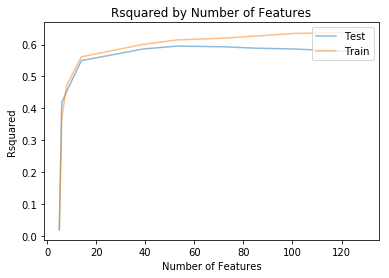

NameError: name 'LinearRegression' is not defined

In [89]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 20, 10, 5]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(x, y, cutoffs)